# Module 8 Report - Movies
## Trends & Insights
<br>

By: Billie Kim

Data Source: https://www.kaggle.com/datasets/danielgrijalvas/movies

## Contents
1. [Objective](#1.-Objective)
2. [Data Exploration](#2.-Data-Exploration)
3. [Subsets of Data](#3.-Subsets-of-Data)
4. [Visualization](#4.-Visualization)
5. [Summary](#5.-Summary)
6. [Recommendations](#6.-Recommendations)

## 1. Objective

Steven Spielberg is one the most famous directors in Hollywood. He has won numerous awards and is recognized to be a pioneer in modern-day American Cinema. We are tasked to analyze characteristics of past movies that can help Mr. Spielberg make an informed decision for his next movie success. We will use a movies dataset hosted on Kaggle and provide Mr. Spielberg with insights that can help him better understand the climate of the current movie trends.

## 2. Data Exploration

In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
# load movies data
# df = pd.read_csv('/Users/bk/Desktop/mod_report8/data/movies.csv')
df = pd. read_csv('/content/movies.csv')

In [3]:
# print dimensions
df.shape

(7668, 15)

**Comment:** There are 7668 records and 15 features in the movies dataset.

In [4]:
# print top 10 rows
df.head(10)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
5,Friday the 13th,R,Horror,1980,"May 9, 1980 (United States)",6.4,123000.0,Sean S. Cunningham,Victor Miller,Betsy Palmer,United States,550000.0,39754601.0,Paramount Pictures,95.0
6,The Blues Brothers,R,Action,1980,"June 20, 1980 (United States)",7.9,188000.0,John Landis,Dan Aykroyd,John Belushi,United States,27000000.0,115229890.0,Universal Pictures,133.0
7,Raging Bull,R,Biography,1980,"December 19, 1980 (United States)",8.2,330000.0,Martin Scorsese,Jake LaMotta,Robert De Niro,United States,18000000.0,23402427.0,Chartoff-Winkler Productions,129.0
8,Superman II,PG,Action,1980,"June 19, 1981 (United States)",6.8,101000.0,Richard Lester,Jerry Siegel,Gene Hackman,United States,54000000.0,108185706.0,Dovemead Films,127.0
9,The Long Riders,R,Biography,1980,"May 16, 1980 (United States)",7.0,10000.0,Walter Hill,Bill Bryden,David Carradine,United States,10000000.0,15795189.0,United Artists,100.0


**Comment:** Taking a first look at the data, we have a fairly good number of diffrent types of characteristics/features that we can use to fulfill our objective.

In [5]:
# print info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [6]:
# check for any duplicates
df.duplicated().sum()

0

**Comment:** This dataset is relatively pretty clean. There are no duplicates. In the info printout, we do see that some features have missing values. Let's take a look at this in more detail.

In [7]:
# check missing values
print('Total Number Missing Values:',df.isnull().sum().sum(),'\n')
df.isnull().sum().sort_values(ascending=False)

Total Number Missing Values: 2473 



budget      2171
gross        189
rating        77
company       17
runtime        4
score          3
votes          3
writer         3
country        3
released       2
star           1
name           0
genre          0
year           0
director       0
dtype: int64

**Comment:** The highest number of missing values are within budget with 2171 NaN values. There are a total  2373 instances of missing values in entire dataset. These will need to be handled in the future if we plan to create models and use ML algorithms.

In [8]:
# print genre categories
df['genre'].unique()

array(['Drama', 'Adventure', 'Action', 'Comedy', 'Horror', 'Biography',
       'Crime', 'Fantasy', 'Family', 'Sci-Fi', 'Animation', 'Romance',
       'Music', 'Western', 'Thriller', 'History', 'Mystery', 'Sport',
       'Musical'], dtype=object)

In [9]:
# print timerange of years
print('Years:', min(df.year),'-', max(df.year))

Years: 1980 - 2020


In [10]:
# print number of unique directors
print('Number of Unique Directors:', len(df['director'].unique()))

Number of Unique Directors: 2949


**Comment:** The timeframe of our data spans 40 years from 1980 to 2020. There are 2949 different directors in our data.

In [11]:
# display movie counts per country
df.country.value_counts().head(15)

United States     5475
United Kingdom     816
France             279
Canada             190
Germany            117
Australia           92
Japan               81
India               62
Italy               61
Spain               47
Hong Kong           45
Ireland             43
China               40
South Korea         35
Denmark             32
Name: country, dtype: int64

**Comment:** Here, we take a look at the counts of films made in each country. We see that the U.S produces the most films followed by the U.K.

## 3. Subsets of Data

In [14]:
# Subset 1 - blockbuster category budgets over $100M
blockbusters_df = df[df.budget >= 100000000].sort_values('budget',ascending=False).reset_index(drop=True)
blockbusters_df.head(10)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0
1,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0
2,Star Wars: Episode VIII - The Last Jedi,PG-13,Action,2017,"December 15, 2017 (United States)",7.0,581000.0,Rian Johnson,Rian Johnson,Daisy Ridley,United States,317000000.0,1.332699e+09,Walt Disney Pictures,152.0
3,Pirates of the Caribbean: at World's End,PG-13,Action,2007,"May 25, 2007 (United States)",7.1,608000.0,Gore Verbinski,Ted Elliott,Johnny Depp,United States,300000000.0,9.609965e+08,Walt Disney Pictures,169.0
4,Justice League,PG-13,Action,2017,"November 17, 2017 (United States)",6.1,418000.0,Zack Snyder,Jerry Siegel,Ben Affleck,United States,300000000.0,6.579270e+08,Warner Bros.,120.0
5,Star Wars: Episode IX - The Rise of Skywalker,PG-13,Action,2019,"December 20, 2019 (United States)",6.5,394000.0,J.J. Abrams,Chris Terrio,Daisy Ridley,United States,275000000.0,1.078233e+09,Walt Disney Pictures,141.0
6,Solo: A Star Wars Story,PG-13,Action,2018,"May 25, 2018 (United States)",6.9,306000.0,Ron Howard,Jonathan Kasdan,Alden Ehrenreich,United States,275000000.0,3.929248e+08,Lucasfilm,135.0
7,Superman Returns,PG-13,Action,2006,"June 28, 2006 (United States)",6.0,274000.0,Bryan Singer,Michael Dougherty,Brandon Routh,United States,270000000.0,3.910812e+08,Warner Bros.,154.0
8,Tangled,PG,Animation,2010,"November 24, 2010 (United States)",7.7,417000.0,Nathan Greno,Dan Fogelman,Mandy Moore,United States,260000000.0,5.924628e+08,Walt Disney Animation Studios,100.0
9,The Lion King,PG,Animation,2019,"July 19, 2019 (United States)",6.9,222000.0,Jon Favreau,Jeff Nathanson,Donald Glover,United States,260000000.0,1.670728e+09,Walt Disney Pictures,118.0


**Comment:** Steven Spielberg makes blockbuster movies that have budgets over $100M. This subset would interest him since its in the space that he is familiar with.

In [15]:
# Subset 2 - Top genres
cols = ['genre','score','budget','gross']
genre_df = df[cols].groupby(['genre']).mean().sort_values(['gross'],ascending=False).reset_index()
genre_df.head(10)

,genre,score,budget,gross
0,Animation,6.769231,7.578520e+07,2.392300e+08
1,Family,6.363636,5.112500e+07,1.961725e+08
2,Action,6.202817,5.808460e+07,1.455086e+08
3,Adventure,6.291569,4.570839e+07,1.093252e+08
4,Mystery,6.665000,3.187647e+07,1.011835e+08
5,Biography,7.030926,2.531232e+07,4.787432e+07
6,Horror,5.750621,1.282516e+07,4.737241e+07
7,Comedy,6.193987,2.260780e+07,4.433187e+07
8,Crime,6.671506,2.236357e+07,3.940120e+07
9,Drama,6.693668,2.291461e+07,3.893096e+07


**Comment:** This subset shows the top genres sorted by gross revenue. The top 5 genres are animation, family, action, adventure, and mystery.

In [16]:
# Subset 3 - Top Directors
agg_type = {'year':'max','name':'count','score':'mean'}
directors_df = df.groupby('director').agg(agg_type).sort_values(['name'],ascending=False).reset_index()
directors_df.rename(columns={'name':'count'}, inplace=True)
directors_df.head(10)

,director,year,count,score
0,Woody Allen,2017,38,6.973684
1,Clint Eastwood,2018,31,6.967742
2,Directors,2020,28,6.548148
3,Steven Spielberg,2018,27,7.440741
4,Ron Howard,2018,24,6.825000
5,Ridley Scott,2017,23,6.926087
6,Steven Soderbergh,2018,23,6.678261
7,Joel Schumacher,2011,22,6.304545
8,Barry Levinson,2015,20,6.485000
9,Martin Scorsese,2019,19,7.673684


**Comment:** This subset shows the top leading directors, year of the latest movie made, number of films, and their average scores. It is not surprising to see that Mr. Steven Spielberg's name can be found on this list!

In [17]:
# Subset 4 - Highest Net Profit
netprofit_df = df[['name','genre','year','budget','gross']]
netprofit_df['profit'] = netprofit_df['gross'] - netprofit_df['budget']
netprofit_df = netprofit_df.sort_values(['profit'],ascending=False).reset_index(drop=True)
netprofit_df.head(10)

,name,genre,year,budget,gross,profit
0,Avatar,Action,2009,237000000.0,2.847246e+09,2.610246e+09
1,Avengers: Endgame,Action,2019,356000000.0,2.797501e+09,2.441501e+09
2,Titanic,Drama,1997,200000000.0,2.201647e+09,2.001647e+09
3,Star Wars: Episode VII - The Force Awakens,Action,2015,245000000.0,2.069522e+09,1.824522e+09
4,Avengers: Infinity War,Action,2018,321000000.0,2.048360e+09,1.727360e+09
5,Jurassic World,Action,2015,150000000.0,1.670516e+09,1.520516e+09
6,The Lion King,Animation,2019,260000000.0,1.670728e+09,1.410728e+09
7,Furious 7,Action,2015,190000000.0,1.515341e+09,1.325341e+09
8,Frozen II,Animation,2019,150000000.0,1.450027e+09,1.300027e+09
9,The Avengers,Action,2012,220000000.0,1.518816e+09,1.298816e+09


**Comment:** This subset calculates and sort values based on the net profit of each film. Taking a look at the top 10 rows, we see that action movies seem to have the highest net payouts.

In [24]:
# Subset 5 - Top Actors
agg_type = {'year':'max','name':'count','score':'mean'}
directors_df = df.groupby('star').agg(agg_type).sort_values(['name'],ascending=False).reset_index()
directors_df.rename(columns={'name':'count'}, inplace=True)
directors_df.head(10)

,star,year,count,score
0,Nicolas Cage,2018,43,6.167442
1,Tom Hanks,2019,41,6.995122
2,Robert De Niro,2019,41,6.719512
3,Denzel Washington,2018,37,6.908108
4,Bruce Willis,2018,34,6.514706
5,Tom Cruise,2018,34,6.850000
6,Johnny Depp,2017,33,6.933333
7,Sylvester Stallone,2019,32,6.087500
8,John Travolta,2019,31,5.764516
9,Mel Gibson,2011,29,6.813793


**Comment:** This subset ranks the top actors that have starred in the most films. This will be of interest to Mr. Spielberg since choosing the right actor/actress is also very important for a film's success.

## 4. Visualizations

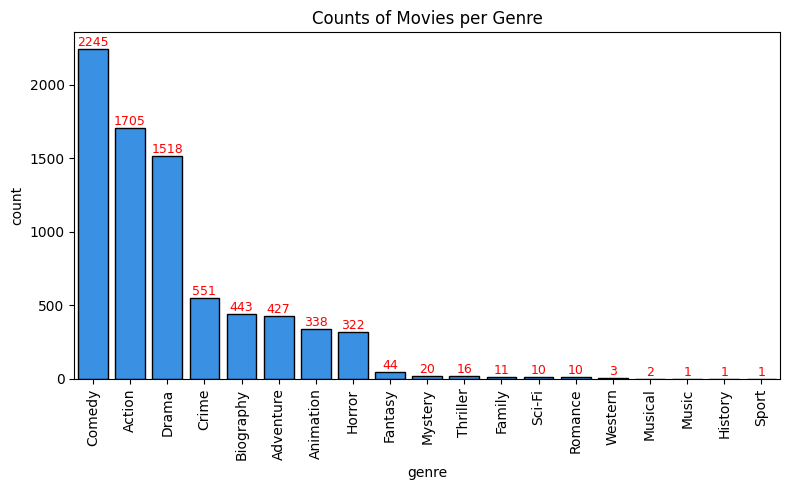

In [18]:
plt.figure(figsize=(8,5))
ax = sns.countplot(x='genre',data=df,order=df.genre.value_counts().index,color='dodgerblue',edgecolor='black')
ax.bar_label(ax.containers[0],size=9,color='red')
plt.title('Counts of Movies per Genre')
plt.xticks(rotation=90)
plt.tight_layout();

**Comment:** This visualization shows the counts of films in each genre of our dataset. We can clearly see that comedy, action, and drama movies have the highest counts.

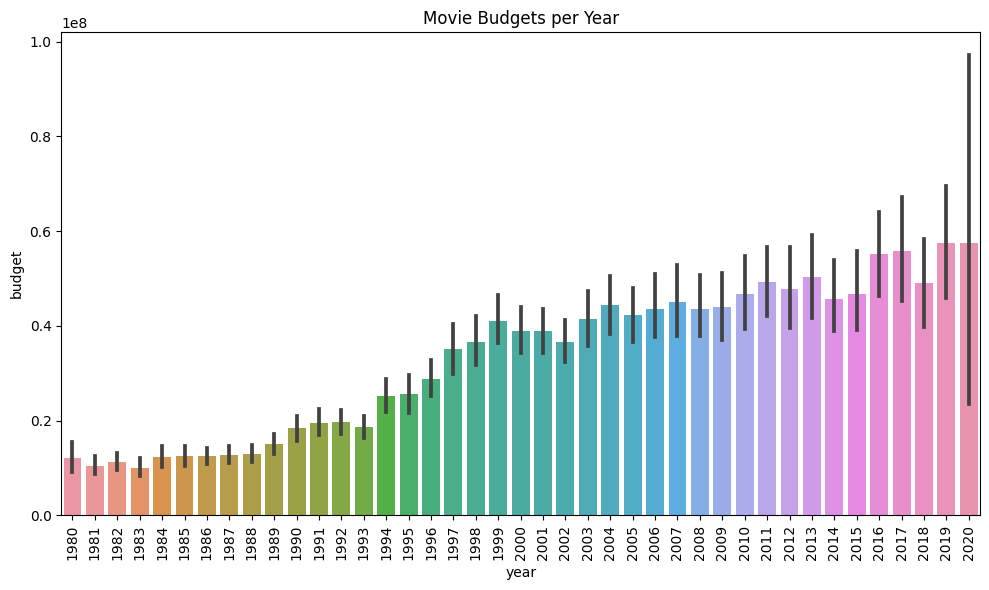

In [19]:
plt.figure(figsize=(10,6))
sns.barplot(x='year',y='budget',data=df)
plt.title('Movie Budgets per Year')
plt.xticks(rotation=90)
plt.tight_layout();

**Comment:** This barplot shows movie budgets each year that spans our dataset. The black lines represent error bars at the 95% confidence interval.

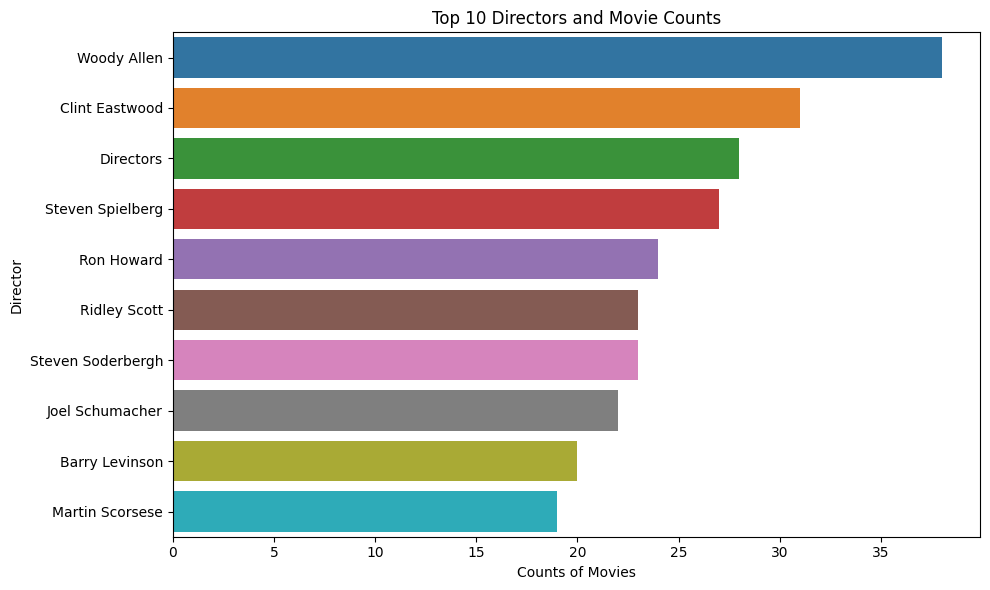

In [20]:
plt.figure(figsize=(10,6))
sns.barplot(x='count',y='director',data=directors_df.head(10))
plt.title('Top 10 Directors and Movie Counts')
plt.xlabel('Counts of Movies')
plt.ylabel('Director')
plt.tight_layout();

**Comment:** This viusalization was created using Subset 3 to visually show the top 10 directors and the number of movies that they have directed in the past 40 years.

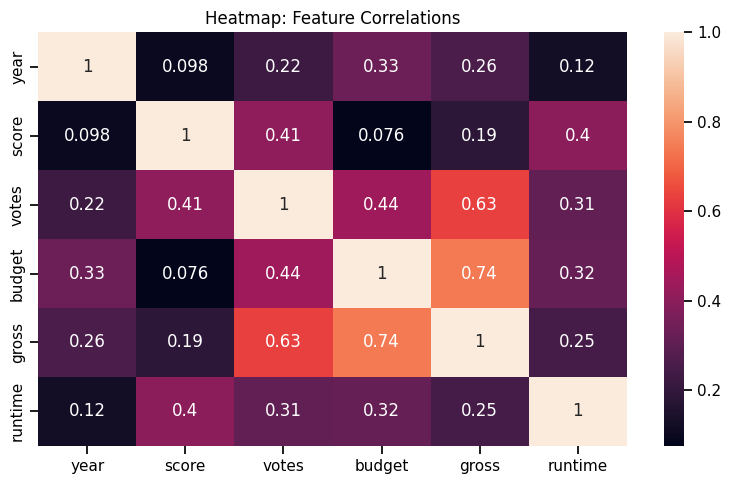

In [21]:
sns.set_context('notebook')
plt.figure(figsize=(8,5))
plt.title('Heatmap: Feature Correlations')
sns.heatmap(df.corr(),annot=True)
plt.tight_layout();

**Comment:** In terms of gross revenue, we see fairly strong positive correlations with votes and budget. This could be a starting point for feature selection if we were to create lienar models in the future.

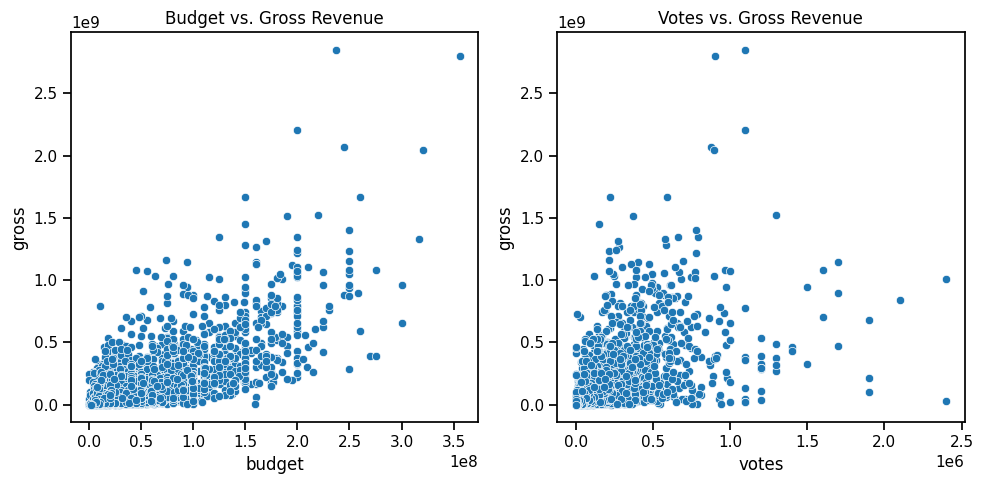

In [22]:
# plt.figure(figsize=(10,10))
fig,axes = plt.subplots(1,2,figsize=(10,5))
ax1 = sns.scatterplot(x='budget',y='gross',data=df,ax=axes[0])
ax2 = sns.scatterplot(x='votes',y='gross',data=df,ax=axes[1])
ax1.title.set_text('Budget vs. Gross Revenue')
ax2.title.set_text('Votes vs. Gross Revenue')
plt.tight_layout();

**Comment:** The scatterplot on the left show the relationship between Gross Revenue and Budget while the scatterplot on the right shows the relationship between Gross Revenue and Votes.

## 5. Summary

The dataset is comprised of 7,668 records and 15 features. The timerange spans 40 years from 1980 to 2020. Although there are no duplicate records, we found a total of 2373 missing values. A large majority can be found in the budget field. In terms of geographic location, the U.S produces the highest number of films which is followed by the U.K. We found that the top genres are animation, family, action, adventure, and mystery. Out of 2949 unique directors, we found that the top directors are Woody Allen, Clint Eastwood, Steven Spielberg, Ron Howard, and Ridley Scott. We also created a new field 'profit' which takes the difference between budget and gross revenue.

## 6. Recommendations

We recommend that Mr. Spielberg focuses on the subsets and visualizations that we have created in this report to determine his next potential movie. Using available and past data to make informed decisions will always pay off in the future. We recommend that Mr. Spielberg considers directing an action movie for this next big hit. In one of the subsets that we created, this genre category appeared to have one of the highest net profits. In the future, the next steps for analysis would be to create prediction models using this dataset which could prove to generate even further insights for Mr. Spielberg.